# 機器學習百日馬拉松期中考 - Enron Fraud Dataset 安隆公司詐欺案

In [1]:
import numpy as np
import pandas as pd

# poi是label
DF = pd.read_csv('train_data.csv')
DF.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


資料只有113 rows

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
poi                          113 non-null bool
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_wi

與email相關的feature的標準差都較大，可能需要scaler

In [10]:
DF.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


### 檢查缺失值

In [4]:
DF.isnull().sum()

name                           0
bonus                         52
deferral_payments             85
deferred_income               79
director_fees                100
email_address                 30
exercised_stock_options       32
expenses                      40
from_messages                 48
from_poi_to_this_person       48
from_this_person_to_poi       48
loan_advances                111
long_term_incentive           64
other                         44
poi                            0
restricted_stock              31
restricted_stock_deferred    103
salary                        40
shared_receipt_with_poi       48
to_messages                   48
total_payments                17
total_stock_value             15
dtype: int64

### 資料缺失過多的欄位將予以拋棄，ＥＸ：
* loan_advances                缺111
* director_fees                缺100
* restricted_stock_deferred    缺103

選feature

In [2]:
x = DF.drop(axis=1, columns=['loan_advances', 'restricted_stock_deferred', 'director_fees', 'deferral_payments', 'deferred_income'])
x.head()

,name,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,True,2748364.0,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,True,6843672.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,1573324.0,True,869220.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,602671.0,907502.0,True,985032.0,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,375304.0,486.0,True,126027.0,240189.0,2188.0,2598.0,1639297.0,126027.0


檢查有沒有整筆是空的資料，若有整筆資料予以移除

In [3]:
x[x.isnull().all(axis=1)]

,name,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


根據poi是true還是flase來補有關email的訊息

In [4]:
from sklearn.preprocessing import Imputer
email_features = ['to_messages', 'from_messages', 'from_this_person_to_poi', 'from_poi_to_this_person']

imp = Imputer(missing_values='NaN', strategy='median', axis=0)

DF.loc[DF[DF.poi == 1].index,email_features] = imp.fit_transform(DF[email_features][DF.poi == 1])
DF.loc[DF[DF.poi == 0].index,email_features] = imp.fit_transform(DF[email_features][DF.poi == 0])

用均值補空值

In [3]:
# 針對數值形態的 (先選出數值形態的)
num_features = []
str_features = []
for dtype, feature in zip(x.dtypes, x.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
    else:
        str_features.append(feature)
print('{} Numeric Features : {}\n'.format(len(num_features), num_features))
x_num = x[num_features]
x_str = x[str_features]

# 補平均值
x_num = x_num.fillna(x_num.mean())
# x_num = x_num.fillna(0)

14 Numeric Features : ['bonus', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']



In [3]:
# 客製imputer, 可以同時處理字串跟數值類型, ref: https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    

imputer = DataFrameImputer()
imp = imputer.fit(x)
print(imp)
x = imp.transform(x)
imp.transform(x).head()

,name,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,ken.rice@enron.com,1.979418e+07,46950.0,18.000000,42.0,4.000000,1.617011e+06,174839.0,2748364.0,420636.0,864.000000,905.000000,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,jeff.skilling@enron.com,1.925000e+07,29336.0,108.000000,88.0,30.000000,1.920000e+06,22122.0,6843672.0,1111258.0,2042.000000,3627.000000,8682716.0,26093672.0
2,SHELBY REX,200000.0,rex.shelby@enron.com,1.624396e+06,22884.0,39.000000,13.0,14.000000,7.926171e+05,1573324.0,869220.0,211844.0,91.000000,225.000000,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,michael.kopper@enron.com,2.985081e+06,118134.0,711.323077,64.8,40.092308,6.026710e+05,907502.0,985032.0,224305.0,1111.369231,2156.061538,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,christopher.calger@enron.com,2.985081e+06,35818.0,144.000000,199.0,25.000000,3.753040e+05,486.0,126027.0,240189.0,2188.000000,2598.000000,1639297.0,126027.0


### 自行創建feature

In [5]:
x_num['fraction_to_poi'] = x_num['from_this_person_to_poi']/x_num['from_messages']
x_num = x_num.replace('inf', 0)

In [4]:
data = x.copy()

data = data.drop(axis=1, columns=['email_address', 'name', 'poi'])

data.loc[:, "salary_p"] = data.loc[:, "salary"]/data.loc[:, "total_payments"]
# data.loc[:, "deferral_payments_p"] = data.loc[:, "deferral_payments"]/data.loc[:, "total_payments"]
# data.loc[:, "loan_advances_p"] = data.loc[:, "loan_advances"]/data.loc[:, "total_payments"]
data.loc[:, "bonus_p"] = data.loc[:, "bonus"]/data.loc[:, "total_payments"]
# data.loc[:, "deferred_income_p"] = data.loc[:, "deferred_income"]/data.loc[:, "total_payments"]
data.loc[:, "expenses_p"] = data.loc[:, "expenses"]/data.loc[:, "total_payments"]
data.loc[:, "other_p"] = data.loc[:, "other"]/data.loc[:, "total_payments"]
data.loc[:, "long_term_incentive_p"] = data.loc[:, "long_term_incentive"]/data.loc[:, "total_payments"]
# data.loc[:, "director_fees_p"] = data.loc[:, "director_fees"]/data.loc[:, "total_payments"]

# data.loc[:, "restricted_stock_deferred_p"] = data.loc[:, "restricted_stock_deferred"]/data.loc[:, "total_stock_value"]
data.loc[:, "exercised_stock_options_p"] = data.loc[:, "exercised_stock_options"]/data.loc[:, "total_stock_value"]
data.loc[:, "restricted_stock_p"] = data.loc[:, "restricted_stock"]/data.loc[:, "total_stock_value"]

data.loc[:, "from_poi_to_this_person_p"] = data.loc[:, "from_poi_to_this_person"]/data.loc[:, "to_messages"]
data.loc[:, "shared_receipt_with_poi_p"] = data.loc[:, "shared_receipt_with_poi"]/data.loc[:, "to_messages"]

data.loc[:, "from_this_person_to_poi_p"] = data.loc[:, "from_this_person_to_poi"]/data.loc[:, "from_messages"]
    
data.replace(to_replace=np.NaN, value=0, inplace=True)
data.replace(to_replace=np.inf, value=0, inplace=True)
data.replace(to_replace=-np.inf, value=0, inplace=True)

### Label

In [5]:
y = x['poi']
x = x.drop(axis=1, columns=['poi'])
y.head()

0    True
1    True
2    True
3    True
4    True
Name: poi, dtype: bool

### 檢查outlier

/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


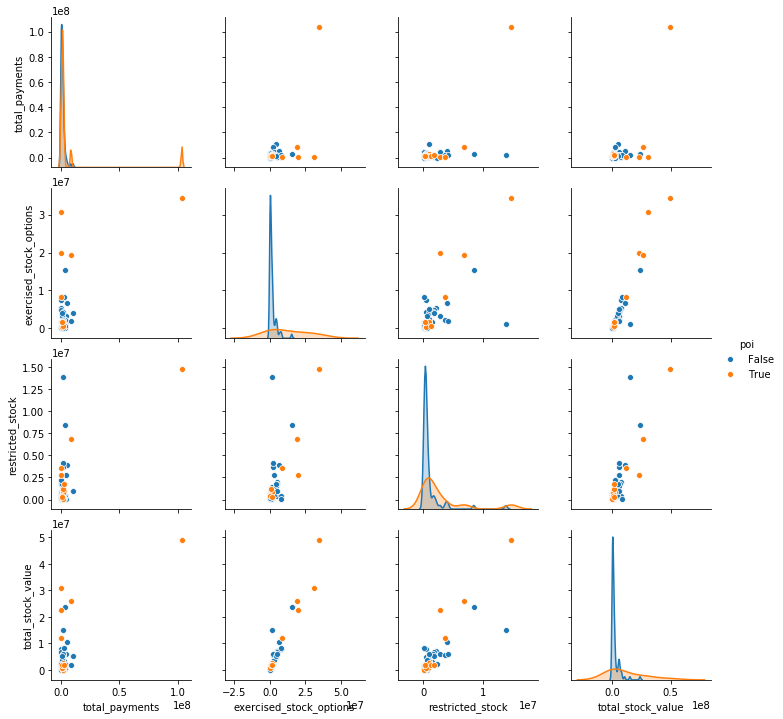

In [6]:
%matplotlib inline
import seaborn as sns
sns.pairplot(data=DF, vars=["total_payments", "exercised_stock_options", "restricted_stock", "total_stock_value"], hue="poi")

印出右上角的outlier

In [6]:
DF.total_payments.nlargest(1)

8    103559793.0
Name: total_payments, dtype: float64

In [8]:
DF.loc[8]

name                                 LAY KENNETH L
bonus                                        7e+06
deferral_payments                           202911
deferred_income                            -300000
director_fees                                  NaN
email_address                kenneth.lay@enron.com
exercised_stock_options                3.43484e+07
expenses                                     99832
from_messages                                   36
from_poi_to_this_person                        123
from_this_person_to_poi                         16
loan_advances                           8.1525e+07
long_term_incentive                        3.6e+06
other                                  1.03597e+07
poi                                           True
restricted_stock                       1.47617e+07
restricted_stock_deferred                      NaN
salary                                 1.07232e+06
shared_receipt_with_poi                       2411
to_messages                    

### 判斷feature重要性

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Decision tree using features with non-null importance
clf = DecisionTreeClassifier(random_state = 75)
clf.fit(x_num, y)

# show the features with non null importance, sorted and create features_list of features for the model
features_importance = []
for i in range(len(clf.feature_importances_)):
    if clf.feature_importances_[i] > 0:
        features_importance.append([x_num.columns[i+1], clf.feature_importances_[i]])
features_importance.sort(key=lambda x: x[1], reverse = True)
for f_i in features_importance:
    print (f_i)

['expenses', 0.2841708602923555]
['from_messages', 0.23050862688713186]
['total_stock_value', 0.16298076923076923]
['exercised_stock_options', 0.1522728539576366]
['from_this_person_to_poi', 0.07726495726495725]
['to_messages', 0.04346153846153846]
['restricted_stock', 0.040648086213303576]
['long_term_incentive', 0.008692307692307574]


In [6]:
feature = data[['salary','bonus','exercised_stock_options','total_stock_value','long_term_incentive_p','from_this_person_to_poi_p']]

另一種評估feature的方式

In [ ]:
pipe = Pipeline([('reduce_dim', PCA(random_state=42)),
                 ('classify', LinearSVC(random_state=42))])

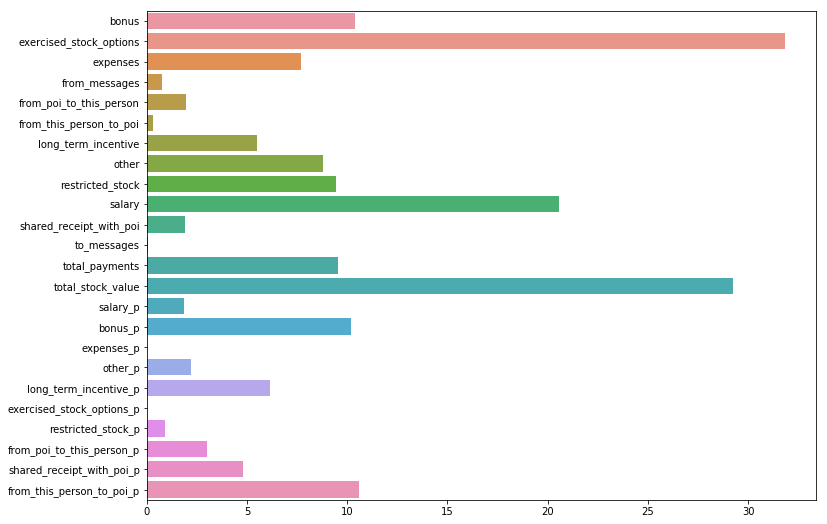

In [14]:
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt

def do_split(data):
    X = data.copy()
    #Removing the poi labels and put them in a separate array, transforming it from True / False to 0 / 1
    y = X.pop("poi").astype(int)
    
    return X, y


def plot_importance(dataset):
    X, y = do_split(dataset)

    selector = SelectPercentile(percentile=100)
    a = selector.fit(X, y)

    plt.figure(figsize=(12,9))
    sns.barplot(y=X.columns, x=a.scores_)

plot_importance(data)

移除不重要的feature

In [5]:
x_num = x_num.drop(axis=1, columns=['from_messages', 'to_messages', 'long_term_incentive']) 

### 做feature scaling
尤其是to_message, from_message與expenses

In [7]:
from sklearn import preprocessing
minMaxScale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = minMaxScale.fit(feature.values)
X = scaler.transform(feature.values)

In [8]:
clf_basic = DecisionTreeClassifier(random_state = 75)
# 僅作測試準確度用，並未建立可再利用的模型
cross_val_score(clf_basic, x_num, y, cv= 10)

array([1.        , 0.83333333, 0.91666667, 0.90909091, 0.90909091,
       1.        , 0.81818182, 0.81818182, 0.72727273, 0.81818182])

### DNN

In [8]:
# 將true/ false轉0/ 1
y_num = y.map({False: 0, True: 1}).astype(int)

In [6]:
# 解決softmax shape問題
def oneHot(data):
    X = len(set(data))
    ohe = np.zeros((len(data), X))
    for i in range(len(data)):
        ohe[i][data[i]] = 1
    return ohe

y_ohe = oneHot(y_num)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

DNNmodel = Sequential()
DNNmodel.add(Dense(64, input_dim=6, activation='relu'))
DNNmodel.add(Dense(32, activation='relu'))
DNNmodel.add(Dense(20, activation='relu'))
DNNmodel.add(Dense(10, activation='relu'))
DNNmodel.add(Dense(1, activation='sigmoid'))
# DNNmodel.add(Dense(2, activation='softmax'))
DNNmodel.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                660       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 3,409
Trainable params: 3,409
Non-trainable params: 0
_________________________________________________________________


對name, email做oneHot試試看準確度

In [9]:
DNNmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# softmax的話, y要用y_ohe
train_history = DNNmodel.fit(x=X, y=y, epochs=10, batch_size=10, verbose=2)

Epoch 1/10
 - 0s - loss: 0.6770 - acc: 0.8850
Epoch 2/10
 - 0s - loss: 0.6329 - acc: 0.8850
Epoch 3/10
 - 0s - loss: 0.5782 - acc: 0.8850
Epoch 4/10
 - 0s - loss: 0.5132 - acc: 0.8850
Epoch 5/10
 - 0s - loss: 0.4487 - acc: 0.8850
Epoch 6/10
 - 0s - loss: 0.4072 - acc: 0.8850
Epoch 7/10
 - 0s - loss: 0.3742 - acc: 0.8850
Epoch 8/10
 - 0s - loss: 0.3571 - acc: 0.8850
Epoch 9/10
 - 0s - loss: 0.3361 - acc: 0.8850
Epoch 10/10
 - 0s - loss: 0.3215 - acc: 0.8850


### 預測

In [10]:
# 處理所有前處理該做的事
def preProcess(df):
    df = df.drop(axis=1, columns=['loan_advances', 'restricted_stock_deferred', 'director_fees', 'deferral_payments', 'deferred_income', 'email_address', 'name'])

    # 這裡的特徵處理應該延續train data (append再train後，以全部平均來補)     
    num_features = []
    for dtype, feature in zip(df.dtypes, df.columns):
        if dtype == 'float64' or dtype == 'int64':
            num_features.append(feature)
    df = df[num_features]

    df = df.fillna(df.mean())
    
    
    data = df.copy()

    data.loc[:, "salary_p"] = data.loc[:, "salary"]/data.loc[:, "total_payments"]
    data.loc[:, "bonus_p"] = data.loc[:, "bonus"]/data.loc[:, "total_payments"]
    data.loc[:, "expenses_p"] = data.loc[:, "expenses"]/data.loc[:, "total_payments"]
    data.loc[:, "other_p"] = data.loc[:, "other"]/data.loc[:, "total_payments"]
    data.loc[:, "long_term_incentive_p"] = data.loc[:, "long_term_incentive"]/data.loc[:, "total_payments"]
    data.loc[:, "exercised_stock_options_p"] = data.loc[:, "exercised_stock_options"]/data.loc[:, "total_stock_value"]
    data.loc[:, "restricted_stock_p"] = data.loc[:, "restricted_stock"]/data.loc[:, "total_stock_value"]
    data.loc[:, "from_poi_to_this_person_p"] = data.loc[:, "from_poi_to_this_person"]/data.loc[:, "to_messages"]
    data.loc[:, "shared_receipt_with_poi_p"] = data.loc[:, "shared_receipt_with_poi"]/data.loc[:, "to_messages"]
    data.loc[:, "from_this_person_to_poi_p"] = data.loc[:, "from_this_person_to_poi"]/data.loc[:, "from_messages"]

    data.replace(to_replace=np.NaN, value=0, inplace=True)
    data.replace(to_replace=np.inf, value=0, inplace=True)
    data.replace(to_replace=-np.inf, value=0, inplace=True)
    
    df = data[['salary','bonus','exercised_stock_options','total_stock_value','long_term_incentive_p','from_this_person_to_poi_p']]
    
    df = scaler.transform(df.values)

    return df

In [11]:
DF2 = pd.read_csv('test_features.csv')
DF2_predict = preProcess(DF2)

In [14]:
DF2.isnull().sum()

name                          0
bonus                        12
deferral_payments            22
deferred_income              18
director_fees                29
email_address                 5
exercised_stock_options      12
expenses                     11
from_messages                12
from_poi_to_this_person      12
from_this_person_to_poi      12
loan_advances                31
long_term_incentive          16
other                         9
restricted_stock              5
restricted_stock_deferred    25
salary                       11
shared_receipt_with_poi      12
to_messages                  12
total_payments                4
total_stock_value             5
dtype: int64

In [17]:
submit = clf.predict(DF2_predict)
submit

array([False,  True,  True, False, False,  True,  True,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False])

DNN的預測

In [16]:
DF2_predict.head()

,salary,bonus,exercised_stock_options,total_stock_value,long_term_incentive_p,from_this_person_to_poi_p
0,213999.0,5249999.0,9.531360e+05,1110705.0,0.622336,0.223140
1,278601.0,1350000.0,1.756609e+07,252055.0,0.364960,0.555556
2,243293.0,1500000.0,5.538001e+06,6391065.0,5.601357,0.656250
3,365163.0,3000000.0,2.291113e+06,3614261.0,0.272744,0.198436
4,415189.0,1000000.0,1.756609e+07,2502063.0,0.187290,0.244898


In [12]:
submit_DNN = DNNmodel.predict(DF2_predict)
submit_DNN

array([[1.29633740e-01],
       [1.92674130e-01],
       [7.58059174e-02],
       [1.27152443e-01],
       [1.89731196e-01],
       [1.92478582e-01],
       [1.62587225e-01],
       [1.37180254e-01],
       [7.65786171e-02],
       [1.27144217e-01],
       [6.60495237e-02],
       [4.58882116e-02],
       [9.99167114e-02],
       [0.00000000e+00],
       [1.44572988e-01],
       [8.21847469e-02],
       [1.07973754e-01],
       [1.45718426e-01],
       [1.12178266e-01],
       [5.42676523e-02],
       [1.97895290e-03],
       [1.35520443e-01],
       [1.25778809e-01],
       [1.51825882e-02],
       [8.97502005e-02],
       [2.64956683e-01],
       [6.70273602e-02],
       [8.28878110e-05],
       [1.12297945e-01],
       [1.17833048e-01],
       [5.09990007e-02],
       [1.11065857e-01],
       [1.34901479e-01]], dtype=float32)

In [13]:
DF_submit = pd.DataFrame()
DF_submit['name'] = DF2['name']
DF_submit['poi'] = submit_DNN
DF_submit.head()

,name,poi
0,BELDEN TIMOTHY N,0.129634
1,BOWEN JR RAYMOND M,0.192674
2,HANNON KEVIN P,0.075806
3,DELAINEY DAVID W,0.127152
4,CAUSEY RICHARD A,0.189731


In [14]:
DF_submit.to_csv('submit.csv', index=False)